In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
male=pd.read_csv('male.txt', header=None, names=['Name'])
male

,Name
0,Aamir
1,Aaron
2,Abbey
3,Abbie
4,Abbot
...,...
2938,Zeus
2939,Zippy
2940,Zollie
2941,Zolly


In [4]:
Gender = np.zeros(2943,dtype=int)
male['Gender'] = Gender.tolist()

In [5]:
male

,Name,Gender
0,Aamir,0
1,Aaron,0
2,Abbey,0
3,Abbie,0
4,Abbot,0
...,...,...
2938,Zeus,0
2939,Zippy,0
2940,Zollie,0
2941,Zolly,0


In [6]:
female=pd.read_csv('female.txt', header=None, names=['Name'])
female

,Name
0,Abagael
1,Abagail
2,Abbe
3,Abbey
4,Abbi
...,...
4996,Zorine
4997,Zsa Zsa
4998,Zsazsa
4999,Zulema


In [7]:
Gender = np.ones(5001,dtype=int)
female['Gender'] = Gender.tolist()

In [8]:
df = pd.concat([male,female])
df

,Name,Gender
0,Aamir,0
1,Aaron,0
2,Abbey,0
3,Abbie,0
4,Abbot,0
...,...,...
4996,Zorine,1
4997,Zsa Zsa,1
4998,Zsazsa,1
4999,Zulema,1


In [9]:
#Imbalanced dataset
df.groupby(['Gender'])['Gender'].count()

Gender
0    2943
1    5001
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

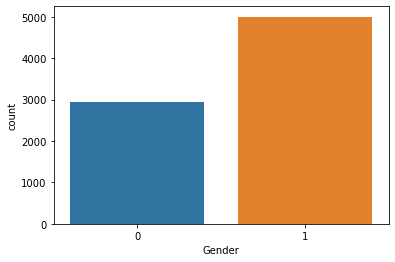

In [10]:
sns.countplot(x=df['Gender'])

In [11]:
count_vectorizer = CountVectorizer().fit(df['Name'])
x = count_vectorizer.transform(df['Name'])

In [12]:
y = df.Gender

# Oversampling Imbalanced dataset

In [13]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state = 1)
x, y = os.fit_resample(x,y)

# Train and test splitting

In [14]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 1)

# Naive Bayes with MultinomiaNB 

In [15]:
NB = MultinomialNB()
NB.fit(x_train,y_train)
NB_pred = NB.predict(x_test)

In [16]:
NB_score_train = NB.score(x_train,y_train)
NB_score_test = NB.score(x_test,y_test)
print(NB_score_train,NB_score_test)

0.967870950539928 0.7401039584166333


In [17]:
NB_model = classification_report(y_test,NB_pred) 
matrix_NB = pd.DataFrame(confusion_matrix(y_test, NB_pred))
roc_auc_NB = roc_auc_score(y_test,NB_pred )
print(NB_model,matrix_NB, roc_auc_NB)


              precision    recall  f1-score   support

           0       0.92      0.53      0.67      1256
           1       0.67      0.96      0.79      1245

    accuracy                           0.74      2501
   macro avg       0.79      0.74      0.73      2501
weighted avg       0.80      0.74      0.73      2501
      0     1
0  661   595
1   55  1190 0.7410485892615045


# SVC

In [18]:
SVC = SVC()
SVC.fit(x_train,y_train)
SVC_pred = SVC.predict(x_test)

In [19]:
SVC_score_train = SVC.score(x_train,y_train)
SVC_score_test = SVC.score(x_test,y_test)
print(SVC_score_train,SVC_score_test)

0.9680042660978536 0.7405037984806078


In [20]:
SVC_model = classification_report(y_test,SVC_pred) 
matrix_SVC = pd.DataFrame(confusion_matrix(y_test, SVC_pred))
roc_auc_SVC = roc_auc_score(y_test,SVC_pred )
print(SVC_model, matrix_SVC, roc_auc_SVC)

              precision    recall  f1-score   support

           0       0.92      0.53      0.67      1256
           1       0.67      0.96      0.79      1245

    accuracy                           0.74      2501
   macro avg       0.80      0.74      0.73      2501
weighted avg       0.80      0.74      0.73      2501
      0     1
0  661   595
1   54  1191 0.7414501956872075


# Logisticregression

In [21]:
LR_model = LogisticRegression(penalty = 'elasticnet',tol=0.01, C = 7,solver='saga',l1_ratio = 0.4, random_state = 1)
LR_model.fit(x_train,y_train)
LR_model_pred = LR_model.predict(x_test)

In [22]:

LR_score_train = LR_model.score(x_train,y_train)
LR_score_test = LR_model.score(x_test,y_test)
print(LR_score_train,LR_score_test)

0.9680042660978536 0.7397041183526589


# GridSearchCv

In [26]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-2, 2, 10),
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter' : [100,50,75,600]
    }
]

In [27]:
Grid = GridSearchCV(LR_model, param_grid = param_grid, cv = 4, verbose = True, n_jobs=-1)

In [28]:
Grid = Grid.fit(x_train,y_train)

Fitting 4 folds for each of 800 candidates, totalling 3200 fits


In [29]:
Grid_pred = Grid.predict(x_test)

In [30]:
Grid_score_train = Grid.score(x_train,y_train)
Grid_score_test = Grid.score(x_test,y_test)
print(Grid_score_train,Grid_score_test)

0.9680042660978536 0.7556977209116353


In [31]:
Grid_model = classification_report(y_test,Grid_pred) 
matrix_Grid = pd.DataFrame(confusion_matrix(y_test, Grid_pred))
roc_auc_Grid = roc_auc_score(y_test,Grid_pred )
print(Grid_model, matrix_Grid, roc_auc_Grid)

              precision    recall  f1-score   support

           0       0.93      0.56      0.70      1256
           1       0.68      0.96      0.80      1245

    accuracy                           0.76      2501
   macro avg       0.80      0.76      0.75      2501
weighted avg       0.81      0.76      0.75      2501
      0     1
0  699   557
1   54  1191 0.7565775842222393


# RESULTS

In [32]:
models = ["MultinomialNb", 
                'SVC',
                "Logisticregression",
                'GridSearchCv'] 

test_scores = [
               NB.score(x_test, y_test),
               SVC.score(x_test,y_test),
               LR_model.score(x_test,y_test),
               Grid.score(x_test, y_test)
               ]

In [33]:
results = pd.DataFrame(test_scores, columns = ["Test Score"], index = models)
results.sort_values(by = 'Test Score', ascending = False)

,Test Score
GridSearchCv,0.755698
SVC,0.740504
MultinomialNb,0.740104
Logisticregression,0.739704
